In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/data_shots_processed.pkl?raw=true
!wget https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/data_shots.pkl?raw=true

--2021-02-26 16:10:25--  https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/data_shots_processed.pkl?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/sports-analytics/raw/master/data_shots_processed.pkl [following]
--2021-02-26 16:10:25--  https://github.com/Dinesh-Adhithya-H/sports-analytics/raw/master/data_shots_processed.pkl
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/sports-analytics/master/data_shots_processed.pkl [following]
--2021-02-26 16:10:25--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/sports-analytics/master/data_shots_processed.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDClassifier,LogisticRegression,SGDRegressor,LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [ ]:
data1=pd.read_pickle("./data_shots.pkl?raw=true")

In [ ]:
y_goal=[]
goal_index=[]
not_goal_index=[]
y=[]
for i in data1["outcome"].index:
  if data1["outcome"].loc[i]=="Goal":
    goal_index.append(i)
    y.append(1)
  else:
    not_goal_index.append(i)
    y.append(0)

In [ ]:
len(goal_index),len(not_goal_index)

(1767, 13115)

In [ ]:
index=goal_index+not_goal_index[:1767]

In [ ]:
len(index)

3534

In [ ]:
data=pd.read_pickle("./data_shots_processed.pkl?raw=true")

In [ ]:
data.head()

,body_part,play_type,technique,pass_height,pass_length,play_pattern,no_opponent,no_teammate,location_x,location_y,pass_location_x,pass_location_y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,Leg,Open Play,Normal,Ground Pass,16.360012,From Throw In,0,0,98.1,52.1,91.2,71.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Leg,Open Play,Normal,Ground Pass,9.552486,From Free Kick,2,0,96.6,51.5,98.5,63.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Head,Open Play,Normal,High Pass,30.248306,Regular Play,1,0,112.1,30.6,103.8,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Leg,Open Play,Normal,Ground Pass,14.406942,From Free Kick,0,0,104.5,41.1,92.0,38.9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Leg,Open Play,Normal,Ground Pass,24.528350,From Throw In,1,0,111.7,58.7,71.7,67.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data=data.drop(["body_part","play_type","technique","pass_height","play_pattern"],axis=1)

In [ ]:
data=data.iloc[index]

In [ ]:
y=[]
for i in range(1767):
  y.append(0)
for i in range(1767):
  y.append(1)

In [ ]:
x=MinMaxScaler().fit_transform(data)

In [ ]:
from sklearn.utils import shuffle
x,y,index= shuffle(x,y,index, random_state=69)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

# Linear models

In [ ]:
lr=LinearRegression().fit(x_train,y_train)
print(np.mean(np.abs(lr.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred = lr.predict(x_train)
y_train_xg=data1['statsbomb_xg'].iloc[index]
y_train_xg=y_train_xg[:2650]
x,y,z=roc_curve(y_train,y_train_pred)
x1,y1,z1=roc_curve(y_train,y_train_xg)

0.42041761303379527
2650


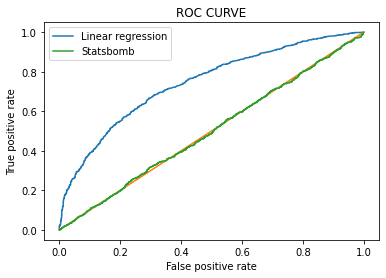

In [ ]:
plt.plot(x,y,label="Linear regression")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_train,y_train_pred),roc_auc_score(y_train,y_train_xg)

(0.7429922007081565, 0.49922018474045654)

No handles with labels found to put in legend.


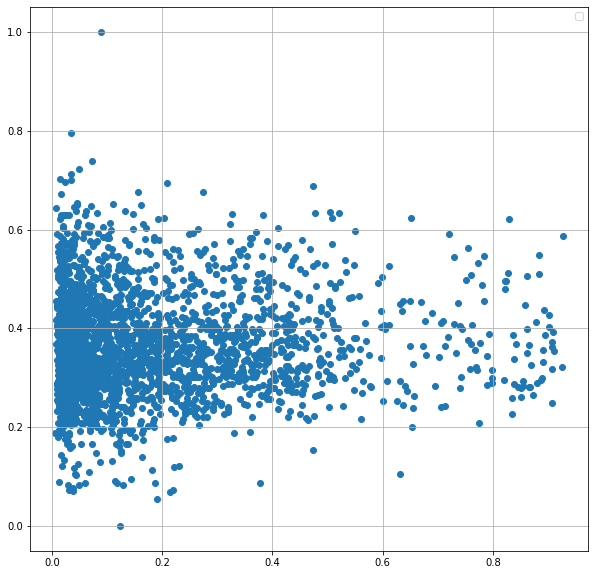

In [ ]:
plt.figure(figsize=(10,10))
y_train_pred=MinMaxScaler().fit_transform(y_train_pred.reshape(-1,1))
y_train_pred=y_train_pred.reshape(2650)
#plt.scatter(np.arange(len(y_train_pred)),y_train_xg-y_train_pred,label="XG-Prediction")
#plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="XG-Prediction")
#plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.scatter(y_train_xg,y_train_pred)
plt.legend()
plt.grid()
plt.show()

In [ ]:
np.mean(y_train_xg),np.mean(y_train_pred)

(0.17329538639060374, 0.36432838313622823)

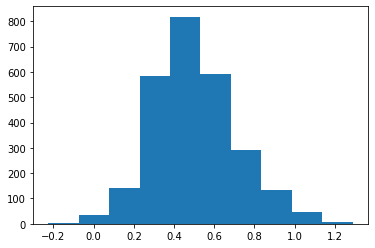

In [ ]:
plt.hist(y_train_pred)
plt.show()

In [ ]:
sgd=SGDRegressor().fit(x_train,y_train)
print(np.mean(np.abs(sgd.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred = sgd.predict(x_train)
#y_train_xg=data1['statsbomb_xg'].iloc[index]
#y_train_xg=y_train_xg[:2650]
x,y,z=roc_curve(y_train,y_train_pred)
x1,y1,z1=roc_curve(y_train,y_train_xg)

0.470940349235555
2650


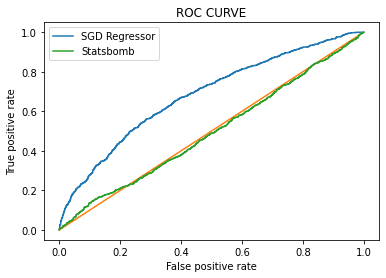

In [ ]:
plt.plot(x,y,label="SGD Regressor")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

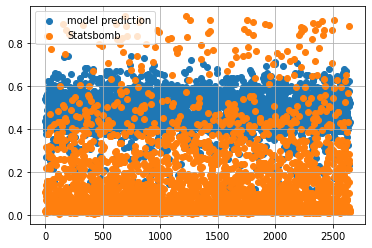

In [ ]:
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.legend()
plt.grid()
plt.show()

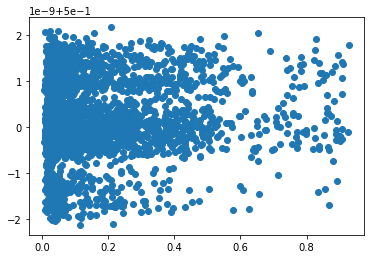

In [ ]:
plt.scatter(y_train_xg,y_train_pred[:,1])

# KNN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnreg=KNeighborsRegressor(n_neighbors=10).fit(x_train,y_train)
print(np.mean(np.abs(knnreg.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred =knnreg.predict(x_train)
#y_train_xg=data1['statsbomb_xg'].iloc[index]
#y_train_xg=y_train_xg[:2650]
x,y,z=roc_curve(y_train,y_train_pred)
x1,y1,z1=roc_curve(y_train,y_train_xg)

0.4042986425339366
2650


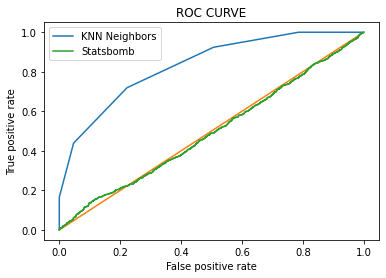

In [ ]:
plt.plot(x,y,label="KNN Neighbors")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

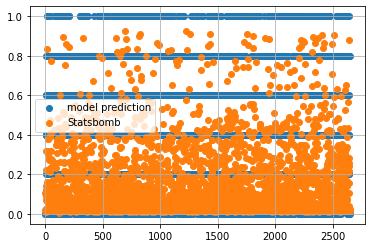

In [ ]:
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.legend()
plt.grid()
plt.show()

# Logistic Regression

In [ ]:
lr=LogisticRegression(C=0.0000000001,solver="liblinear").fit(x_train,y_train)
print(np.mean(np.abs(lr.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred =lr.predict_proba(x_train)
#y_train_xg=data1['statsbomb_xg'].iloc[index]
#y_train_xg=y_train_xg[:2650]
x,y,z=roc_curve(y_train,y_train_pred[:,1])
x1,y1,z1=roc_curve(y_train,y_train_xg)

0.38574660633484165
2650


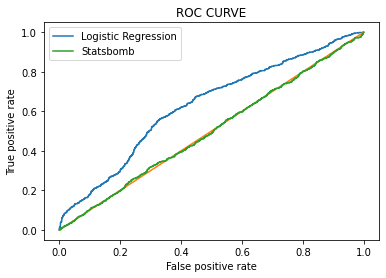

In [ ]:
plt.plot(x,y,label="Logistic Regression")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

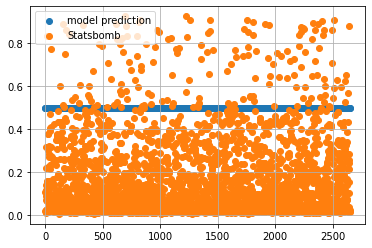

In [ ]:
plt.scatter(np.arange(len(y_train_pred)),y_train_pred[:,1],label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.legend()
plt.grid()
plt.show()

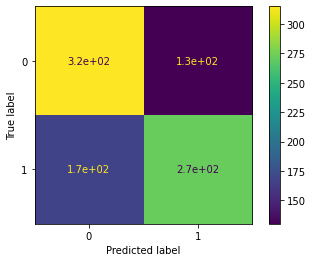

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,x_test,y_test)
plt.show()

# SVC

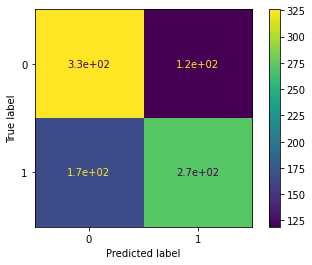

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",C=100.0).fit(x_train,y_train)
plot_confusion_matrix(svc,x_test,y_test)

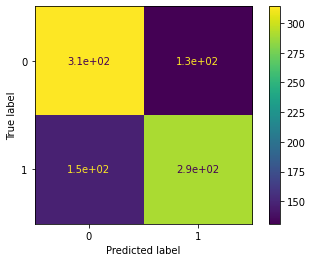

In [ ]:
from sklearn.svm import SVC
svc_rbf=SVC(kernel="rbf",C=100.0).fit(x_train,y_train)
plot_confusion_matrix(svc_rbf,x_test,y_test)

# Decision tree classifier

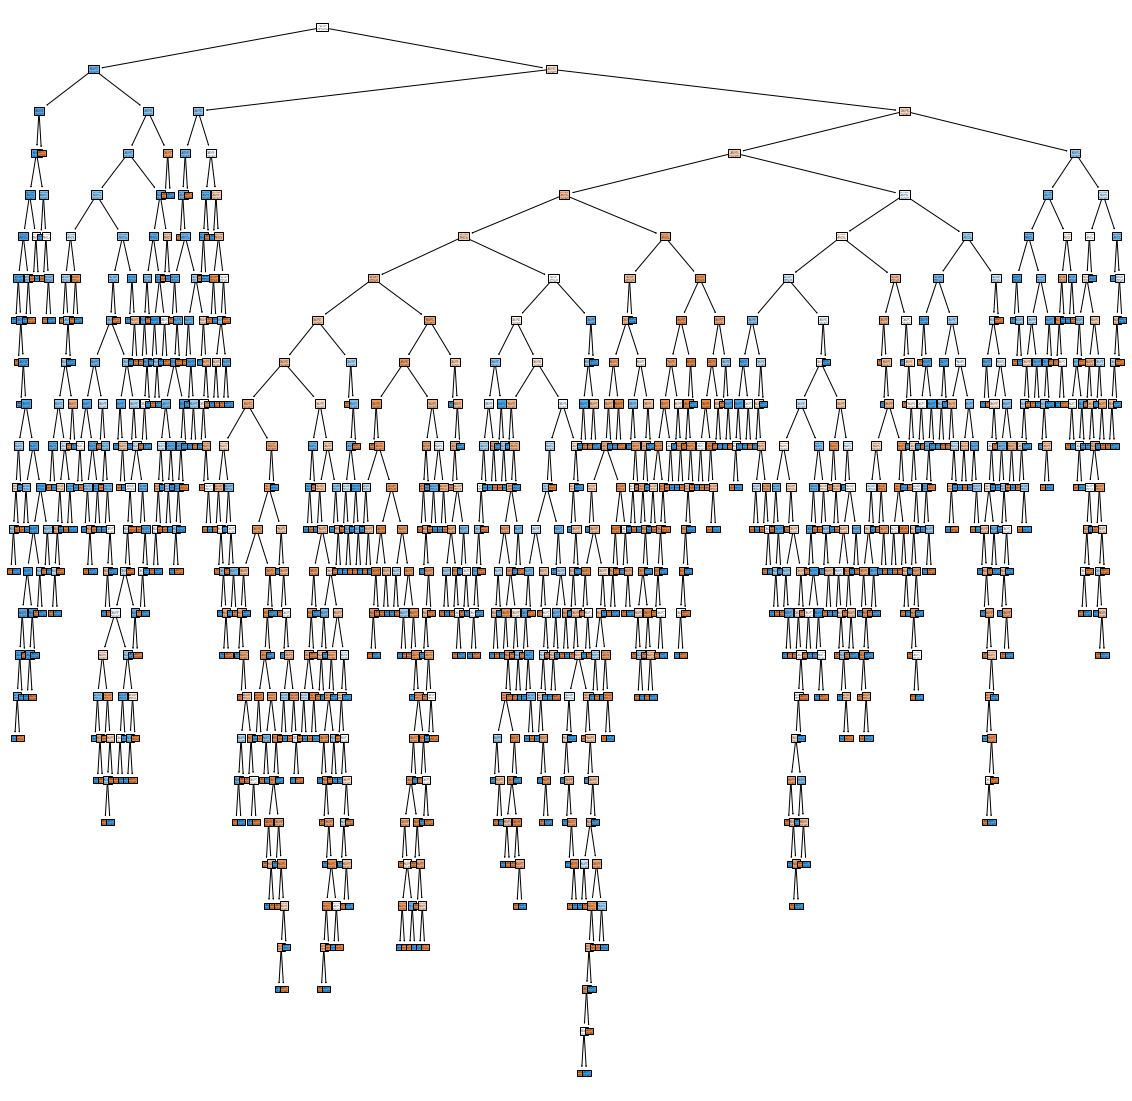

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc=DecisionTreeClassifier().fit(x_train,y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dtc,class_names=["miss","goal"],filled=True)
plt.show()

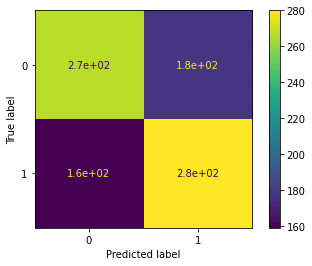

In [ ]:
plot_confusion_matrix(dtc,x_test,y_test)

# Deep Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(1028,input_shape=x_train[0].shape),
  tf.keras.layers.Dense(1208,activation="relu"),
  #keras.layers.Dropout(0.3),
  #keras.layers.BatchNormalization(),
  #tf.keras.layers.Dense(1208,activation="relu"),
  #keras.layers.Dropout(0.3),
  #keras.layers.BatchNormalization(),
  #tf.keras.layers.Dense(1208,activation="relu"),
  #keras.layers.Dropout(0.3),
  #keras.layers.BatchNormalization(),
  #tf.keras.layers.Dense(1208,activation="relu"),
  #keras.layers.Dropout(0.3),
  #keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(lr=0.005, decay=5e-4),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              31868     
_________________________________________________________________
dense_1 (Dense)              (None, 1208)              1243032   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2418      
Total params: 1,277,318
Trainable params: 1,277,318
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
model.fit(x_train,y_train,epochs=100,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/100
27/27 [==============================] - 2s 45ms/step - loss: 1.1441 - accuracy: 0.5250 - val_loss: 0.6987 - val_accuracy: 0.5441
Epoch 2/100
27/27 [==============================] - 1s 30ms/step - loss: 0.6680 - accuracy: 0.5877 - val_loss: 0.6334 - val_accuracy: 0.6448
Epoch 3/100
27/27 [==============================] - 1s 31ms/step - loss: 0.6318 - accuracy: 0.6276 - val_loss: 0.6401 - val_accuracy: 0.6165
Epoch 4/100
27/27 [==============================] - 1s 31ms/step - loss: 0.6281 - accuracy: 0.6526 - val_loss: 0.6117 - val_accuracy: 0.6584
Epoch 5/100
27/27 [==============================] - 1s 30ms/step - loss: 0.6303 - accuracy: 0.6252 - val_loss: 0.6370 - val_accuracy: 0.6244
Epoch 6/100
27/27 [==============================] - 1s 31ms/step - loss: 0.6240 - accuracy: 0.6455 - val_loss: 0.6333 - val_accuracy: 0.6267
Epoch 7/100
27/27 [==============================] - 1s 32ms/step - loss: 0.6063 - accuracy: 0.6605 - val_loss: 0.6190 - val_accuracy: 0.6527
Epoch 

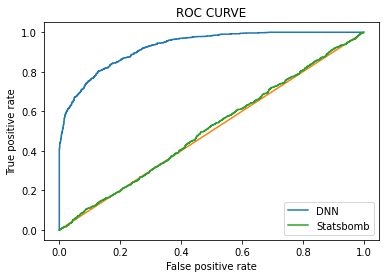

In [ ]:
y_train_pred =model.predict(x_train)
x,y,z=roc_curve(y_train,y_train_pred[:,1].reshape(-1,1))
x1,y1,z1=roc_curve(y_train,y_train_xg)
plt.plot(x,y,label="DNN")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

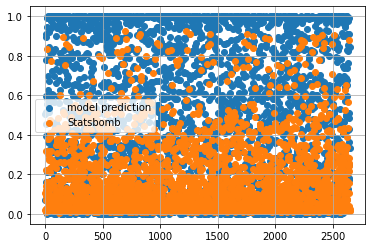

In [ ]:
plt.scatter(np.arange(len(y_train_pred)),y_train_pred[:,1].reshape(-1,1),label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.legend()
plt.grid()
plt.show()

In [ ]:
len(x_train)

2650